# DATA CLEANING

- Nesse trabalho será realizado a limpeza dos dados de um arquivo referente aos alunos de uma escola.
- Os professores anotam as notas no mesmo arquivo, porém em abas diferentes, assim não houve padronização na inserção dos dados.
    - Base de dados: [alunos.xlsx](https://docs.google.com/spreadsheets/d/1L6i7s0UAx4oHyBEIGNV4u9XB3E7ob2RY/edit?usp=sharing&ouid=113635235784384787412&rtpof=true&sd=true) 
    - Notas de português estão na aba `notas_port` e as de matemática na aba `notas_mat`

### Calculando a média obtida na disciplina de português

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando a base de notas de português
port = pd.read_excel('alunos.xlsx', sheet_name = 'notas_port')

In [3]:
# Visualizando a base
port.head()

,ID_aluno,Prova,Notas
0,1,1,10
1,2,1,9
2,3,1,9
3,4,1,8
4,5,1,8


In [4]:
# Gerando a descrição estatística
port.describe()

,ID_aluno,Prova,Notas
count,48.000000,48.000000,48.000000
mean,7.916667,1.979167,8.541667
std,4.241805,0.837666,9.394336
min,1.000000,1.000000,2.000000
25%,4.750000,1.000000,5.000000
50%,7.500000,2.000000,8.000000
75%,11.250000,3.000000,9.000000
max,15.000000,3.000000,70.000000


In [5]:
# Verificando as informações
port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID_aluno  48 non-null     int64
 1   Prova     48 non-null     int64
 2   Notas     48 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [7]:
# E a cardinalidade
port.nunique()

ID_aluno    15
Prova        3
Notas       10
dtype: int64

**Verificando a duplicidade de registros**

In [9]:
# Verificando o número de alunos que temos na base
port.ID_aluno.nunique()

15

In [10]:
# E quantos alunos fizeram cada uma das provas
port.Prova.value_counts()

1    17
3    16
2    15
Name: Prova, dtype: int64

In [13]:
# Podemos usar o value_counts considerando essas duas colunas para verificar os valores duplicados
port[['ID_aluno', 'Prova']].value_counts().head()

ID_aluno  Prova
7         1        3
6         3        2
1         1        1
12        1        1
9         3        1
dtype: int64

In [15]:
# Filtrando o primeiro aluno dos registros
port[port.ID_aluno == 7]
port[port.ID_aluno == 7]

,ID_aluno,Prova,Notas
6,7,1,10
7,7,1,10
8,7,1,10
23,7,2,4
39,7,3,3


In [17]:
# Verificando a média da nota do aluno de ID = 7
port.loc[port.ID_aluno == 7, 'Notas'].mean()

7.4

In [18]:
# Utilizando o drop_duplicates para retirar os valores repetidos
port = port.drop_duplicates()

In [19]:
# Verificando novamente a média da nota desse aluno
port.loc[port.ID_aluno == 7, 'Notas'].mean()

5.666666666666667

**Realizando o tratamento de outliers**

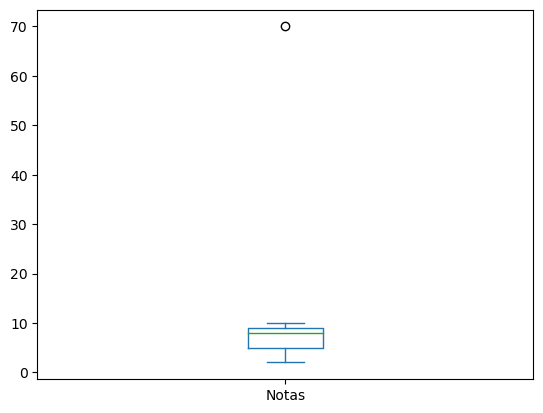

In [21]:
# Verificando o outlier da coluna nota
port.Notas.plot.box();

In [27]:
# Tratando esse valor
port.loc[port.Notas == 70,'Notas'] = 7


/var/folders/nf/6h56zcxs5jl0v4f_shyzqjh80000gp/T/ipykernel_1410/1501814937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port.loc[port.Notas == 70,'Notas'] = 7


In [28]:
# Verificando novamente o describe
port.describe()

,ID_aluno,Prova,Notas
count,45.000000,45.000000,45.000000
mean,8.000000,2.000000,7.222222
std,4.369314,0.825723,2.373039
min,1.000000,1.000000,2.000000
25%,4.000000,1.000000,5.000000
50%,8.000000,2.000000,8.000000
75%,12.000000,3.000000,9.000000
max,15.000000,3.000000,10.000000


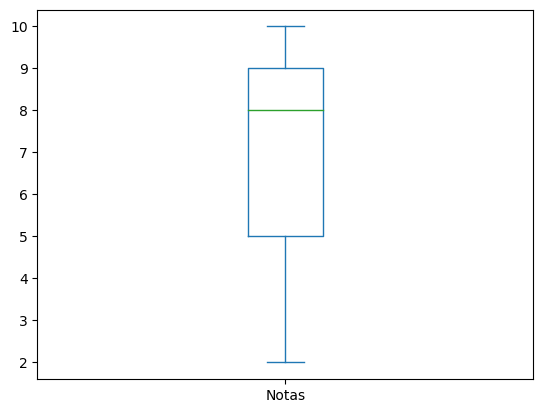

In [29]:
port.Notas.plot.box();

**E então, calculando a média dos alunos**

In [33]:
# Fazendo a média por aluno
media_port = port.groupby('ID_aluno')['Notas'].mean()

In [36]:
media_port

ID_aluno
1     9.000000
2     8.000000
3     8.666667
4     8.000000
5     5.666667
6     7.333333
7     5.666667
8     7.666667
9     8.000000
10    6.666667
11    8.666667
12    6.000000
13    4.333333
14    6.666667
15    8.000000
Name: Notas, dtype: float64

### Calculando a média obtida na disciplina de matemática

In [83]:
# Importando a base
mat = pd.read_excel('alunos.xlsx', sheet_name = 'notas_mat')

In [84]:
# head
mat.head(3)

,ID_aluno,Prova,Notas
0,1,1,B-
1,2,1,A
2,3,1,B


In [85]:
# describe
mat.describe()

,ID_aluno,Prova
count,45.000000,45.000000
mean,8.000000,2.000000
std,4.369314,0.825723
min,1.000000,1.000000
25%,4.000000,1.000000
50%,8.000000,2.000000
75%,12.000000,3.000000
max,15.000000,3.000000


In [86]:
# info
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID_aluno  45 non-null     int64 
 1   Prova     45 non-null     int64 
 2   Notas     45 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [87]:
# nunique
mat.nunique()

ID_aluno    15
Prova        3
Notas       10
dtype: int64

In [88]:
# Visualizando a coluna de notas
mat.Notas.value_counts()

A     12
A-     7
A+     7
B-     5
B      4
C+     3
B+     3
C      2
D      1
C-     1
Name: Notas, dtype: int64

**Como em matemática o professor usa conceitos, precisamos transformar para números para conseguir calcular uma média que seja possível de somar com a média de português**
- Ao perguntar, a escola informou que A+ equivale a 10, A equivale a 9, e assim por diante, até C- equivaler a 2 e D a 1

In [89]:
# Criando a função para trocar as notas
lista_notas = ['A+','A','A-','B+','B','B-','C+','C','C-','D']
lista_valor = [10,9,8,7,6,5,4,3,2,1]

def verifica_nota(nota):
    return lista_valor[lista_notas.index(nota)]

In [90]:
# Aplicando essa função
mat['NotaNr'] = mat.Notas.apply(verifica_nota)
mat = mat.drop(['Notas'], axis = 1)

In [91]:
mat.head()

,ID_aluno,Prova,NotaNr
0,1,1,5
1,2,1,9
2,3,1,6
3,4,1,9
4,5,1,4


**E calculando a média**

In [92]:
# E calculando a média de matemática
media_mat = mat.groupby('ID_aluno')['NotaNr'].mean()

In [93]:
media_mat

ID_aluno
1     6.333333
2     7.333333
3     6.666667
4     7.666667
5     6.333333
6     7.333333
7     6.333333
8     9.666667
9     6.333333
10    8.333333
11    5.000000
12    8.000000
13    6.333333
14    7.333333
15    9.333333
Name: NotaNr, dtype: float64

### Unindo as médias das duas disciplinas

In [95]:
# Unindo as bases
media_final = pd.concat([media_mat, media_port], axis = 1).reset_index()

In [96]:
media_final

,ID_aluno,NotaNr,Notas
0,1,6.333333,9.000000
1,2,7.333333,8.000000
2,3,6.666667,8.666667
3,4,7.666667,8.000000
4,5,6.333333,5.666667
5,6,7.333333,7.333333
6,7,6.333333,5.666667
7,8,9.666667,7.666667
8,9,6.333333,8.000000
9,10,8.333333,6.666667


In [97]:
# Ajustando as colunas
media_final.columns = ['ID_aluno', 'media_mat', 'media_port']

In [98]:
media_final.head()

,ID_aluno,media_mat,media_port
0,1,6.333333,9.000000
1,2,7.333333,8.000000
2,3,6.666667,8.666667
3,4,7.666667,8.000000
4,5,6.333333,5.666667


In [101]:
# Calculando a média final
media_final['Final'] = (media_final.media_mat + media_final.media_port) / 2

In [102]:
# Verificando a base
media_final

,ID_aluno,media_mat,media_port,Final
0,1,6.333333,9.000000,7.666667
1,2,7.333333,8.000000,7.666667
2,3,6.666667,8.666667,7.666667
3,4,7.666667,8.000000,7.833333
4,5,6.333333,5.666667,6.000000
5,6,7.333333,7.333333,7.333333
6,7,6.333333,5.666667,6.000000
7,8,9.666667,7.666667,8.666667
8,9,6.333333,8.000000,7.166667
9,10,8.333333,6.666667,7.500000
